In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [3]:
import os
import glob
import cv2
from PIL import Image

In [4]:
%matplotlib inline

In [5]:
train_img_path = 'C:/users/asa_f/SJSU/CMPE258/Project/sign-language-single-channel/train'
test_img_path = 'C:/users/asa_f/SJSU/CMPE258/Project/sign-language-single-channel/test'

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
train.head()

,id,filename,label
0,1,1.jpg,5
1,2,2.jpg,8
2,3,3.jpg,7
3,4,4.jpg,4
4,5,5.jpg,0


In [8]:
test.head()

,id,filename
0,1,1.jpg
1,2,2.jpg
2,3,3.jpg
3,4,4.jpg
4,5,5.jpg


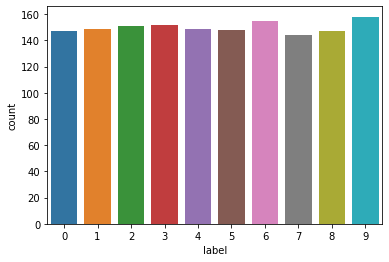

In [9]:
sns.countplot(train['label'])

In [10]:
ordered = []
ordered_imgs = []

for pic in os.listdir(train_img_path):
    
    ordered.append(int(pic.split('.')[0]))
    ordered.sort()

for item in ordered:
    ordered_imgs.append(str(item)+'.jpg')

In [11]:
ordered_imgs

['1.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg',
 '26.jpg',
 '27.jpg',
 '28.jpg',
 '29.jpg',
 '30.jpg',
 '31.jpg',
 '32.jpg',
 '33.jpg',
 '34.jpg',
 '35.jpg',
 '36.jpg',
 '37.jpg',
 '38.jpg',
 '39.jpg',
 '40.jpg',
 '41.jpg',
 '42.jpg',
 '43.jpg',
 '44.jpg',
 '45.jpg',
 '46.jpg',
 '47.jpg',
 '48.jpg',
 '49.jpg',
 '50.jpg',
 '51.jpg',
 '52.jpg',
 '53.jpg',
 '54.jpg',
 '55.jpg',
 '56.jpg',
 '57.jpg',
 '58.jpg',
 '59.jpg',
 '60.jpg',
 '61.jpg',
 '62.jpg',
 '63.jpg',
 '64.jpg',
 '65.jpg',
 '66.jpg',
 '67.jpg',
 '68.jpg',
 '69.jpg',
 '70.jpg',
 '71.jpg',
 '72.jpg',
 '73.jpg',
 '74.jpg',
 '75.jpg',
 '76.jpg',
 '77.jpg',
 '78.jpg',
 '79.jpg',
 '80.jpg',
 '81.jpg',
 '82.jpg',
 '83.jpg',
 '84.jpg',
 '85.jpg',
 '86.jpg',
 '87.jpg',
 '88.jpg',
 '89.jpg',
 '90.jpg',
 '91.jpg',
 '92.jpg

In [12]:
len(ordered_imgs)

1500

# Creating test and train set

In [13]:
'''
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
        else:
            print("There was a None Image")
            break
    return images
    
'''

'\ndef load_images_from_folder(folder):\n    images = []\n    for filename in os.listdir(folder):\n        img = cv2.imread(os.path.join(folder,filename))\n        if img is not None:\n            images.append(img)\n        else:\n            print("There was a None Image")\n            break\n    return images\n    \n'

In [14]:
train_images = []
for filename in ordered_imgs:
    img = cv2.imread(os.path.join(train_img_path,filename), 0)
    if img is not None:
        train_images.append(img)
    else:
        print("There was a None Image")
        break

In [15]:
test_images = []
for filename in os.listdir(test_img_path):
    img = cv2.imread(os.path.join(test_img_path,filename), 0)
    if img is not None:
        test_images.append(img)
    else:
        print("There was a None Image")
        break


In [16]:
train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

In [17]:
train_images.shape

(1500, 64, 64)

In [18]:
test_images.shape

(562, 64, 64)

In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Checking for Null values

In [20]:
train.isnull().describe()

,id,filename,label
count,1500,1500,1500
unique,1,1,1
top,False,False,False
freq,1500,1500,1500


In [21]:
test.isnull().describe()

,id,filename
count,562,562
unique,1,1
top,False,False
freq,562,562


# Creating/Encoding Target

In [22]:
target = to_categorical(train['label'], num_classes = 10)

In [23]:
target

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
Image.fromarray(train_images[3], 'RGB').show()

In [25]:
target[3]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

# Split train and test

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_val, Y_train, Y_val = train_test_split(train_images, target, test_size = 0.15, random_state=1)

In [28]:
X_train = X_train.reshape(1275, 64, 64, 1)
X_val = X_val.reshape(225, 64, 64, 1)

In [29]:
X_train.shape

(1275, 64, 64, 1)

In [30]:
Y_train.shape

(1275, 10)

In [31]:
X_val.shape

(225, 64, 64, 1)

In [32]:
Y_val.shape

(225, 10)

# Model

In [33]:
import tensorflow

In [35]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.optimizers import RMSprop, Adam, Adagrad, Adamax, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [37]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (64,64,1)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (64,64,1)))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation = "softmax"))

In [38]:
optimizer = Adam(lr=0.001)

In [39]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [40]:
epochs = 30 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 24

In [43]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [44]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=3)

In [45]:
#Withou Data Augmentation code
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, Y_val), verbose = 1,
                   callbacks=[learning_rate_reduction,es])

Train on 1275 samples, validate on 225 samples
Epoch 1/30
1275/1275 [==============================] - 14s 11ms/sample - loss: 2.0125 - accuracy: 0.2792 - val_loss: 1.0381 - val_accuracy: 0.6889
Epoch 2/30
1275/1275 [==============================] - 14s 11ms/sample - loss: 0.8699 - accuracy: 0.7098 - val_loss: 0.7276 - val_accuracy: 0.7689
Epoch 3/30
1275/1275 [==============================] - 14s 11ms/sample - loss: 0.4864 - accuracy: 0.8369 - val_loss: 0.4537 - val_accuracy: 0.8667
Epoch 4/30
1275/1275 [==============================] - 14s 11ms/sample - loss: 0.2906 - accuracy: 0.9090 - val_loss: 0.3419 - val_accuracy: 0.8844
Epoch 5/30
1275/1275 [==============================] - 14s 11ms/sample - loss: 0.2097 - accuracy: 0.9357 - val_loss: 0.3428 - val_accuracy: 0.8800
Epoch 6/30
1275/1275 [==============================] - 14s 11ms/sample - loss: 0.1427 - accuracy: 0.9537 - val_loss: 0.3070 - val_accuracy: 0.9111
Epoch 7/30
1275/1275 [==============================] - 15s 11ms/

In [46]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [47]:
from keras.models import model_from_json

In [ ]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [49]:
# Create a converter
converter = tensorflow.lite.TFLiteConverter.from_keras_model(model)
# Convert the model
tflite_model = converter.convert()
# Create the tflite model file
tflite_model_name = "signLang.tflite"
open(tflite_model_name, "wb").write(tflite_model)

35133332

In [ ]:
#With Data Augmentation

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [ ]:
datagen.fit(X_train)

In [ ]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])